In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def combine_csv(csv1, csv2):
    rmsd_df = pd.read_csv(csv1)
    rmsd_df['description'] = rmsd_df['description'].str[:-5]
    
    i_sc_df = pd.read_csv(csv2)
    merged_df = pd.merge(i_sc_df, rmsd_df, on='description', how='right')
    #print(merged_df)

    return merged_df


In [7]:
def i_score_vs_rmsd(df, title):
    fig, ax = plt.subplots(1,1,figsize=(10,7.5))

    kwargs_title={'fontsize':30, 'weight':'bold', 'color':'0.2'}
    kwargs_label={'fontsize':30, 'weight':'bold', 'color':'0.2'}
    kwargs_ticks={'fontsize':20, 'weight':'bold', 'color':'0.2'}
    kwargs_plots={"alpha":0.5,"lw":1, "edgecolors":None,"s":10}


    # Axes
    plt.title("Relationship Between I_sc and RMSD:\n" + title,**kwargs_title)
    plt.ylabel("Interface Score (REU)\n",**kwargs_label)
    plt.xlabel("\nRMSD (Å)",**kwargs_label)
    plt.yticks(**kwargs_ticks)
    plt.xticks(**kwargs_ticks)
    plt.xlim(-1,60)
    plt.ylim(-38, 2)

    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(2.5)
        ax.spines[axis].set_color('0.2')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(width=2.5,length=5,pad=10, color='0.2')
    
    t=df["rmsd"]
    
    plt.scatter(df["rmsd"], df["I_sc"], c='#4B3C88', **kwargs_plots)
    plt.savefig('./score_vs_rmsd/Isc_rmsd_' + title + '.png',dpi=300,bbox_inches='tight')
    
    #2E7382


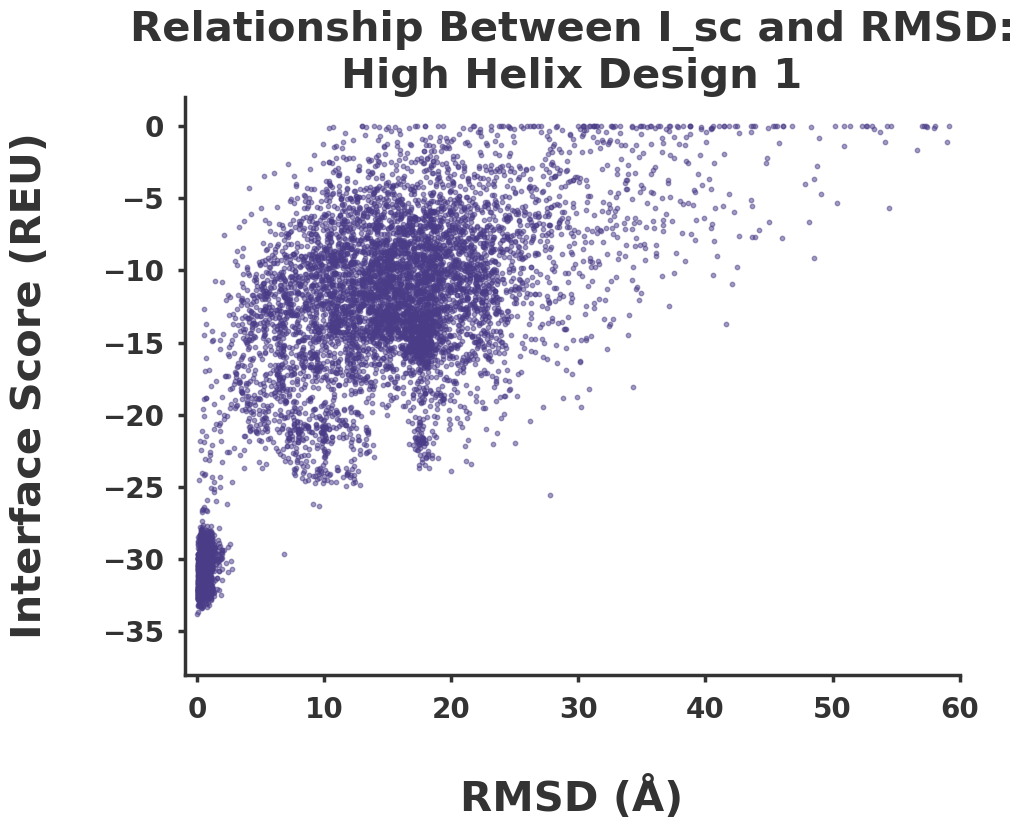

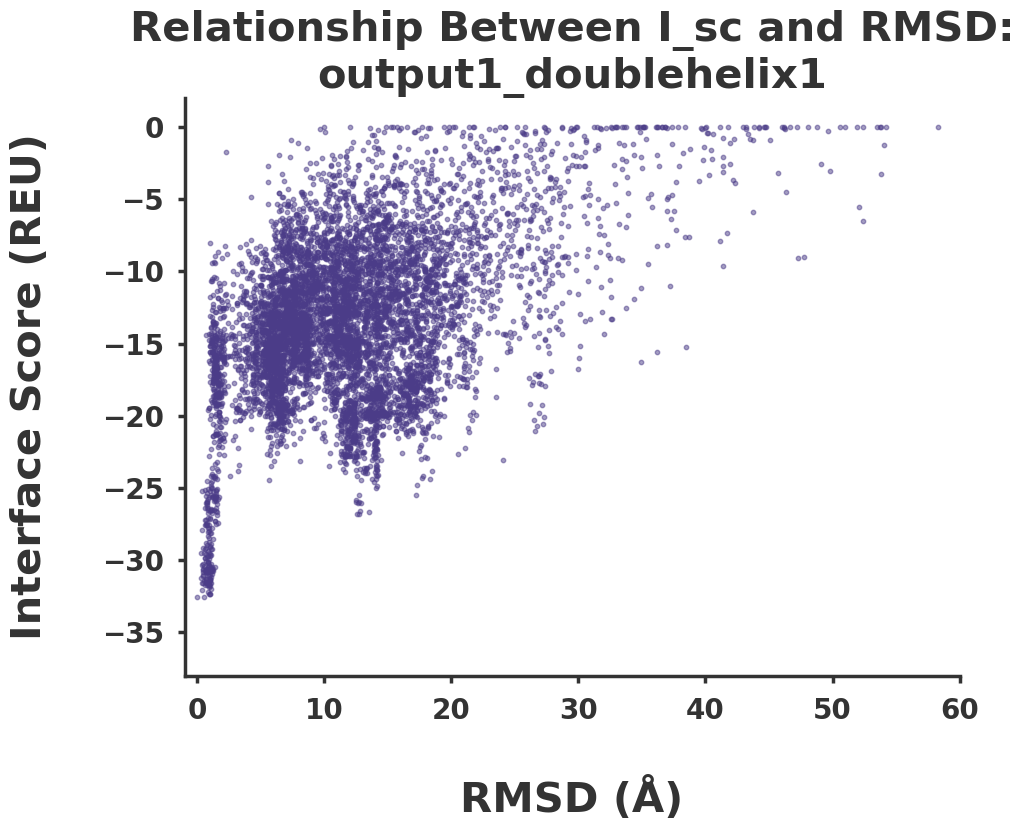

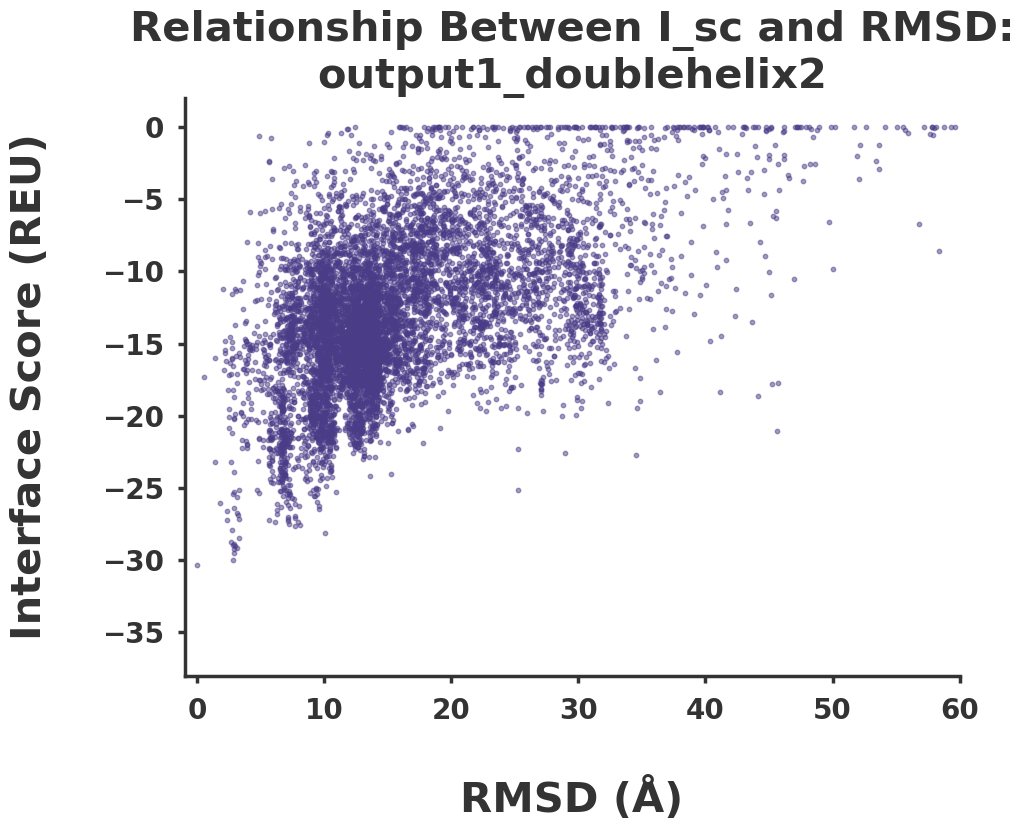

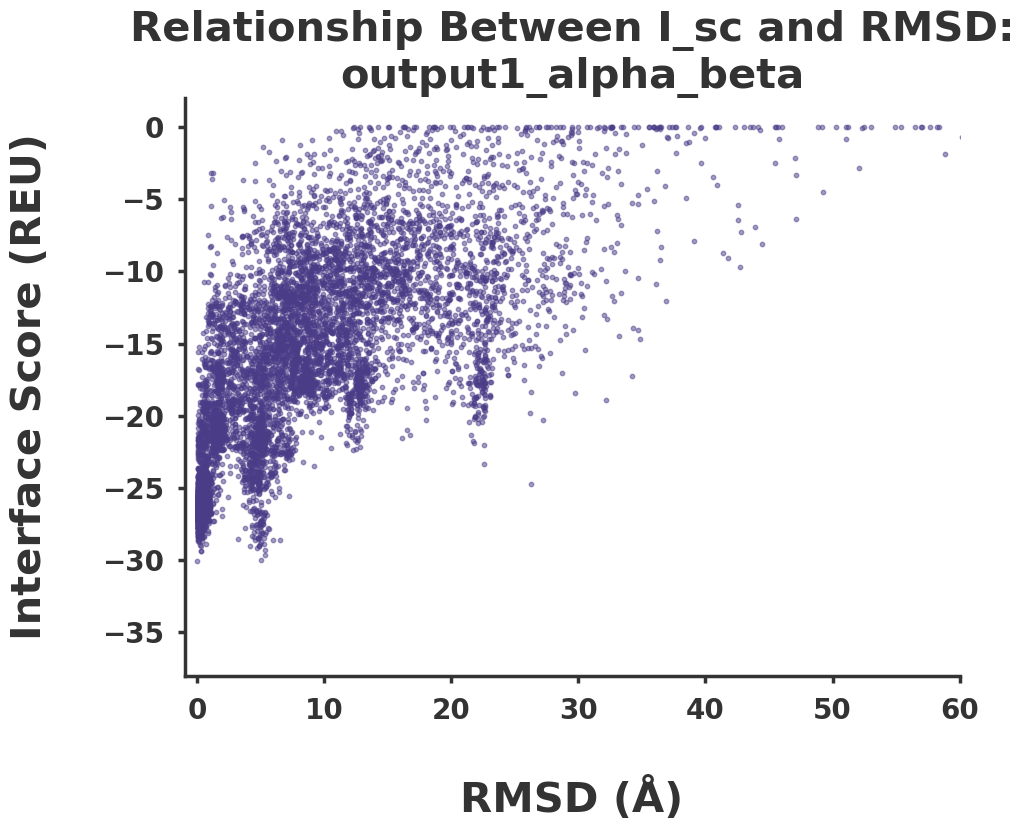

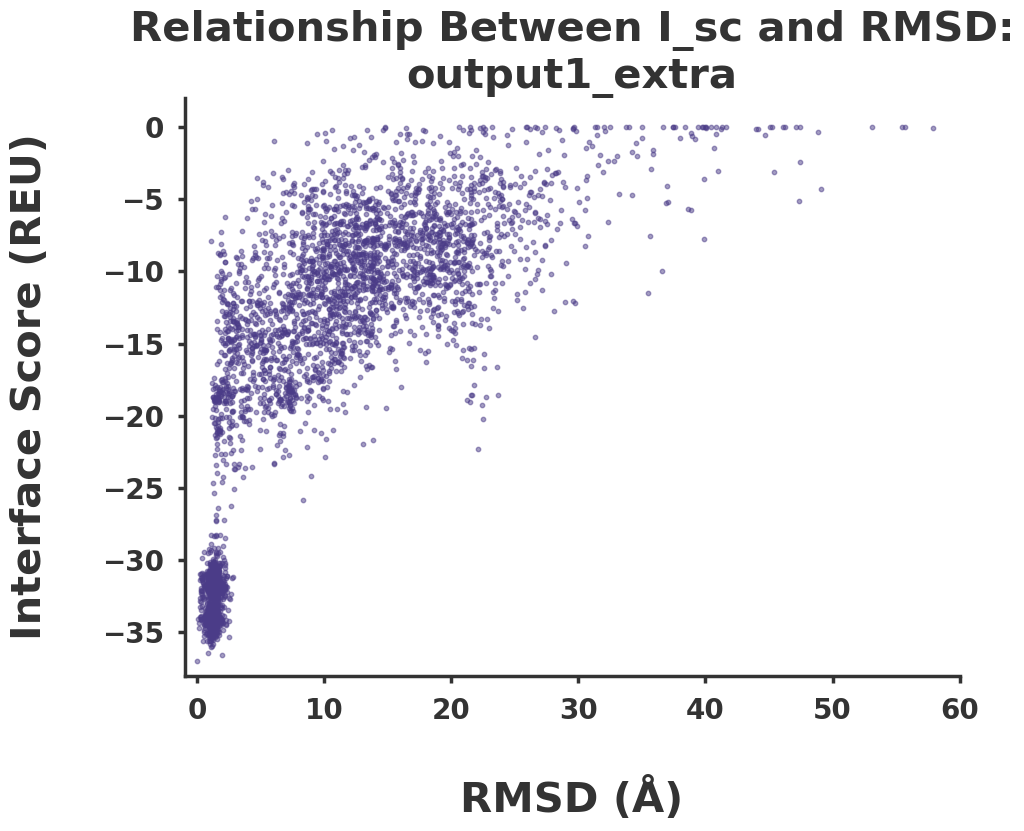

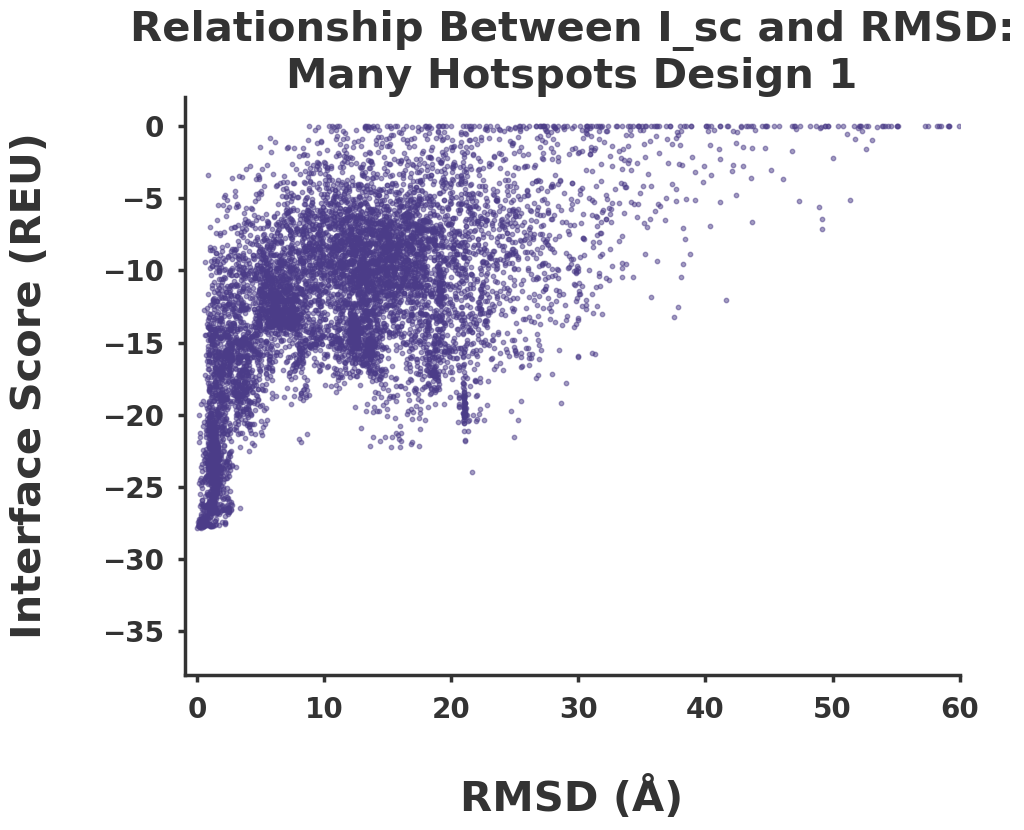

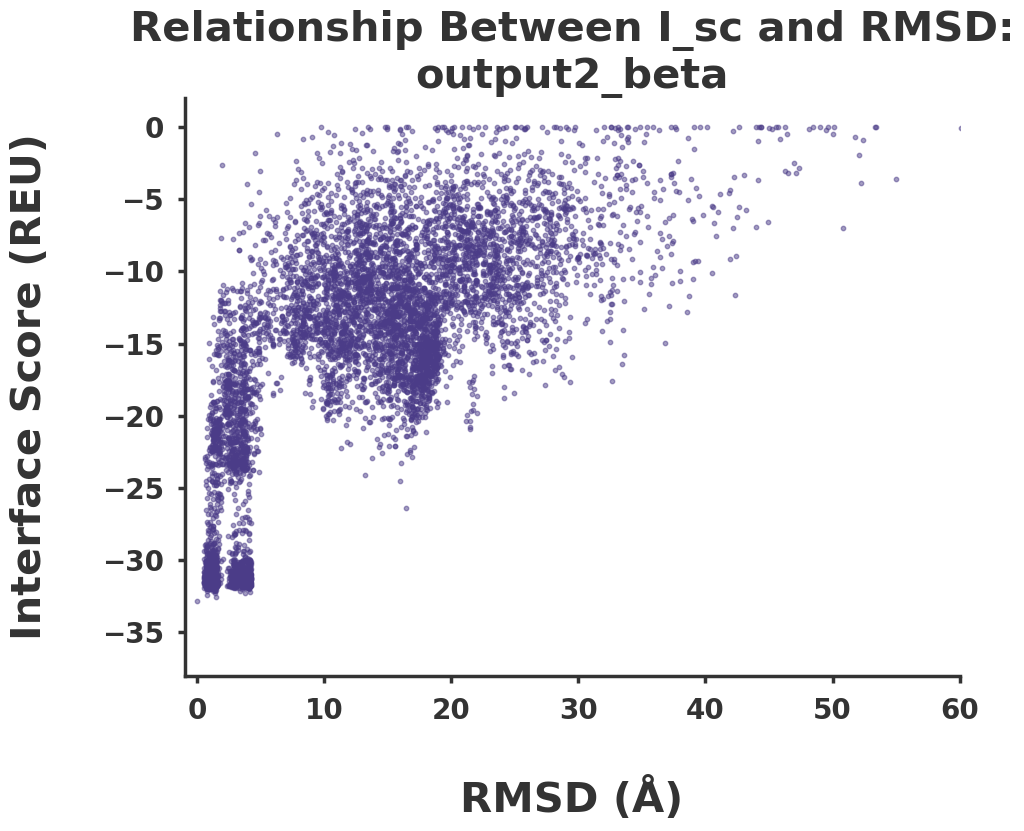

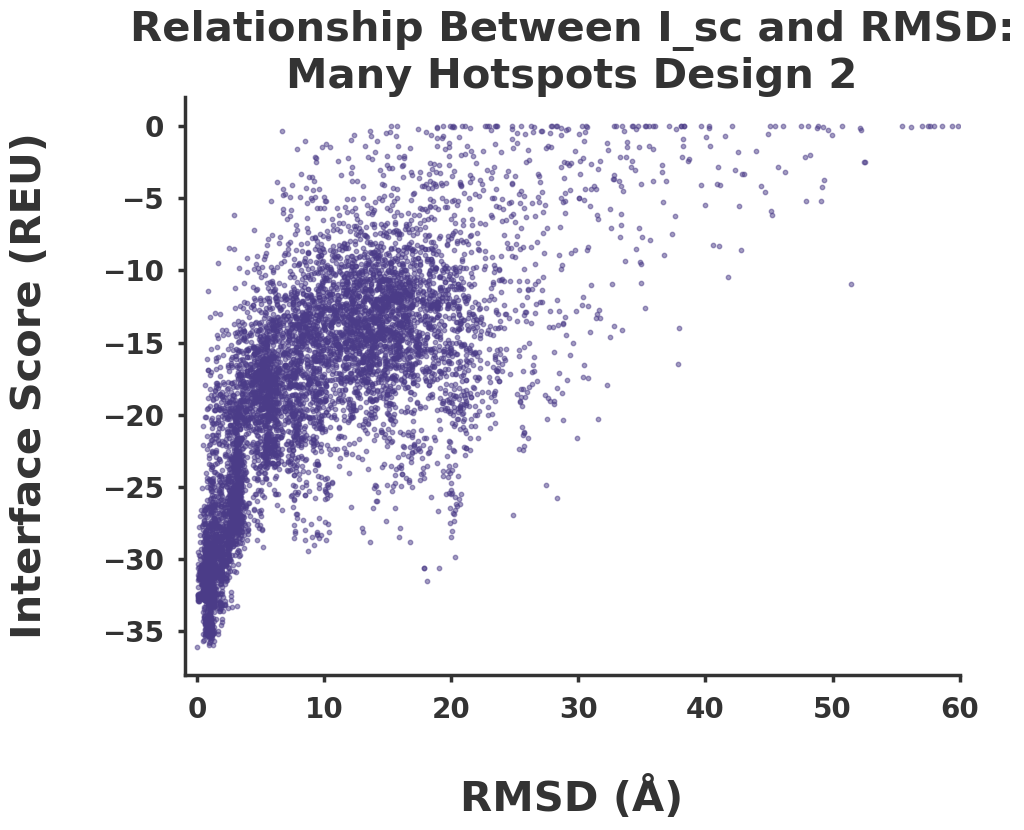

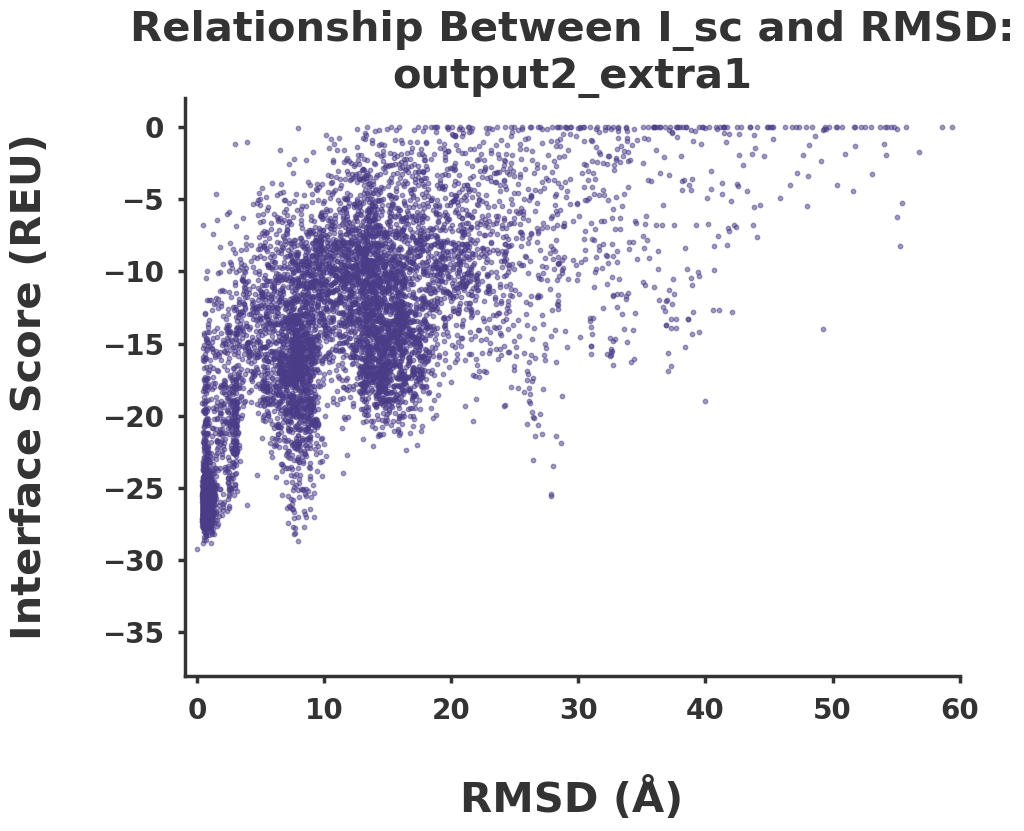

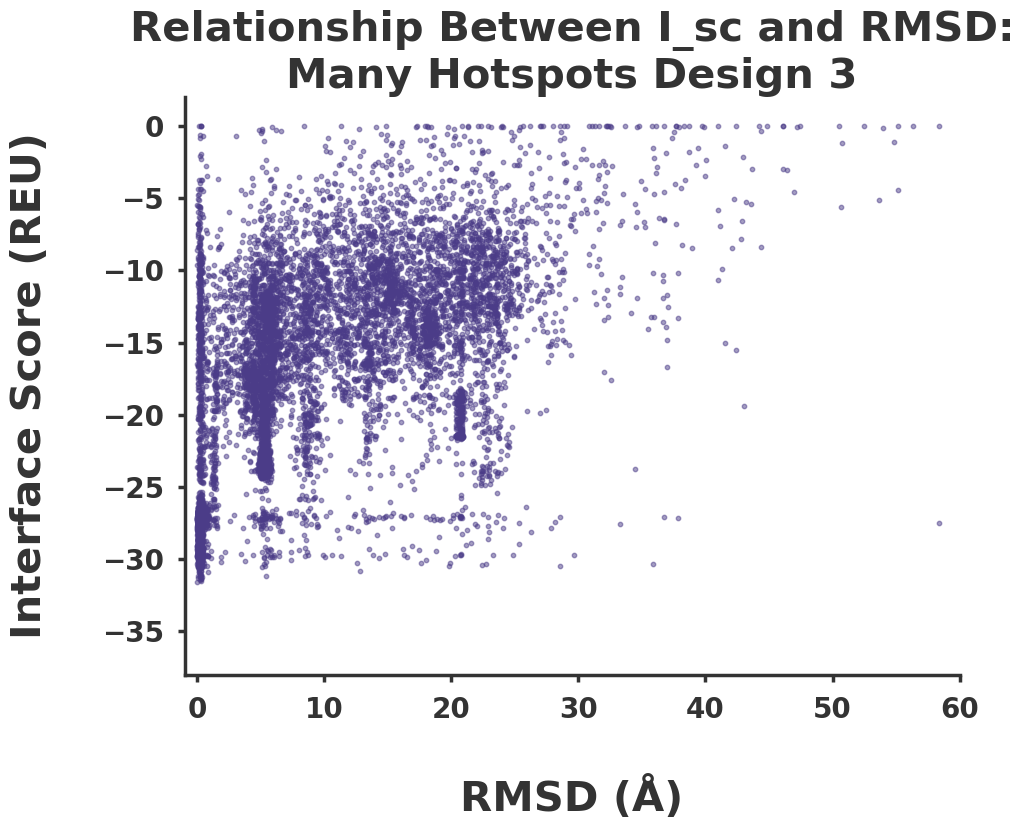

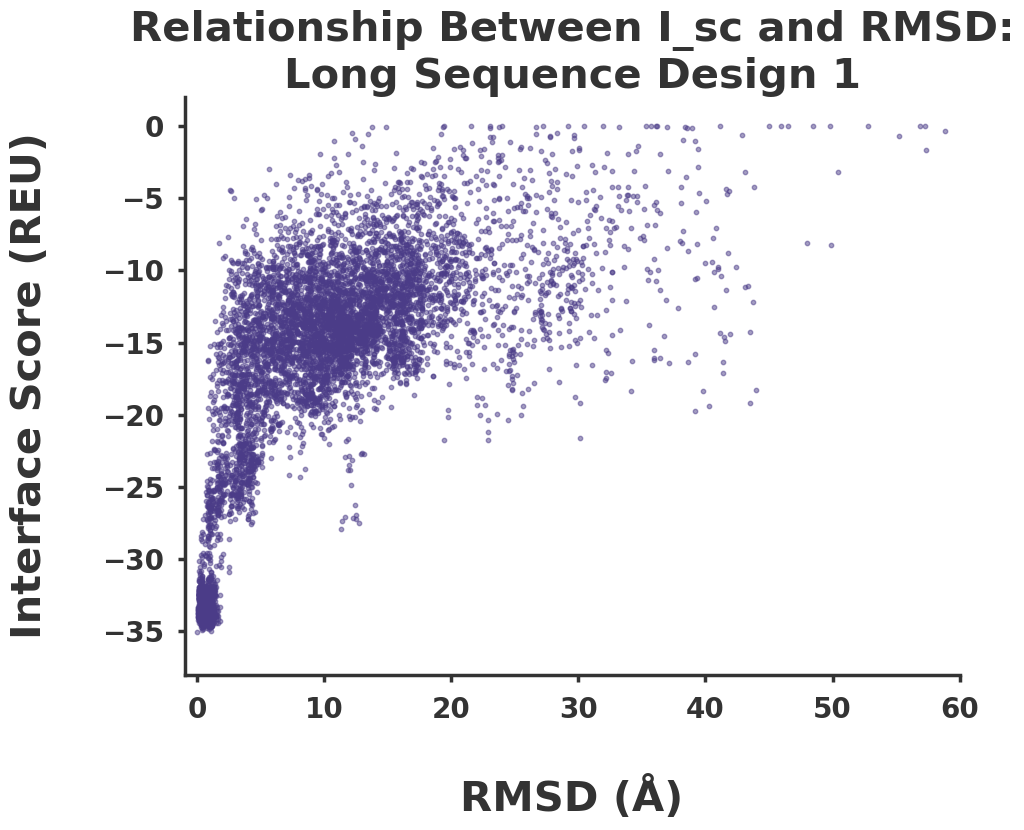

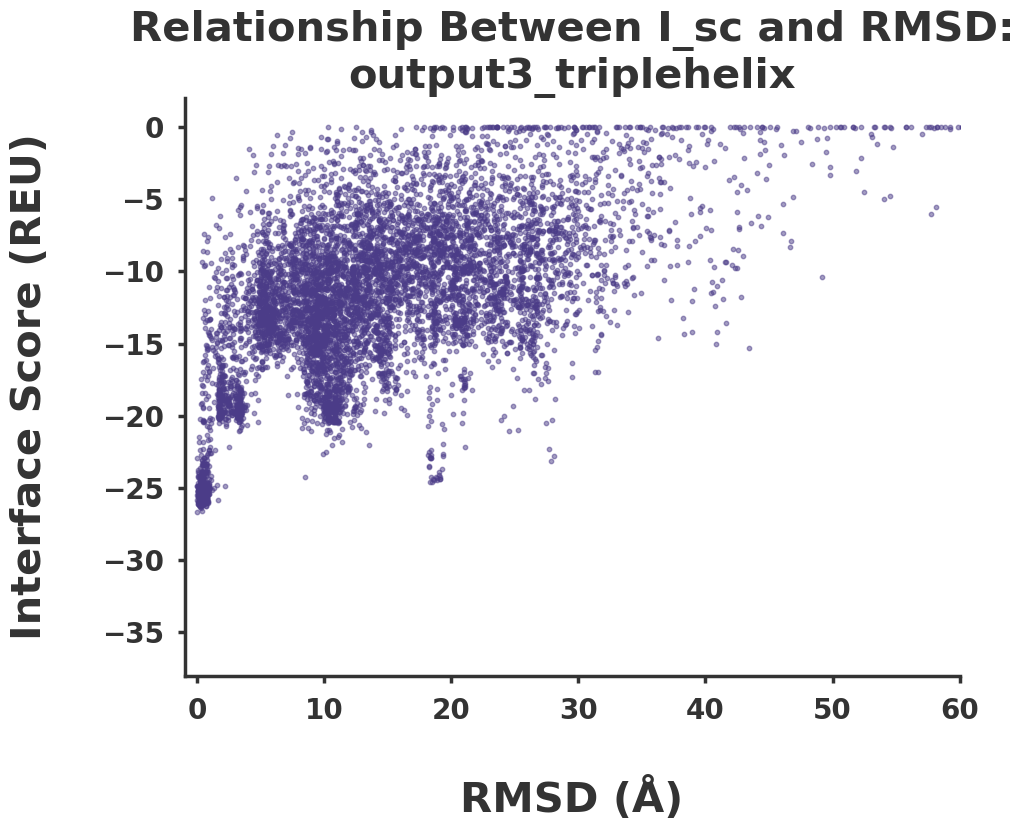

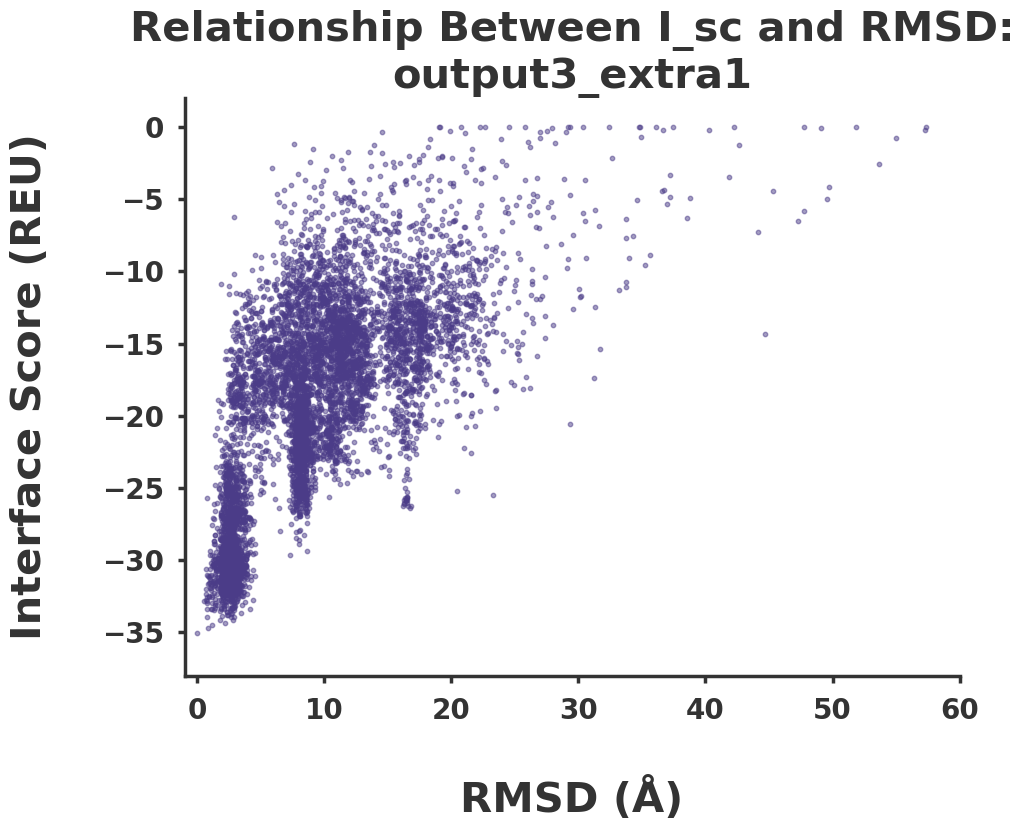

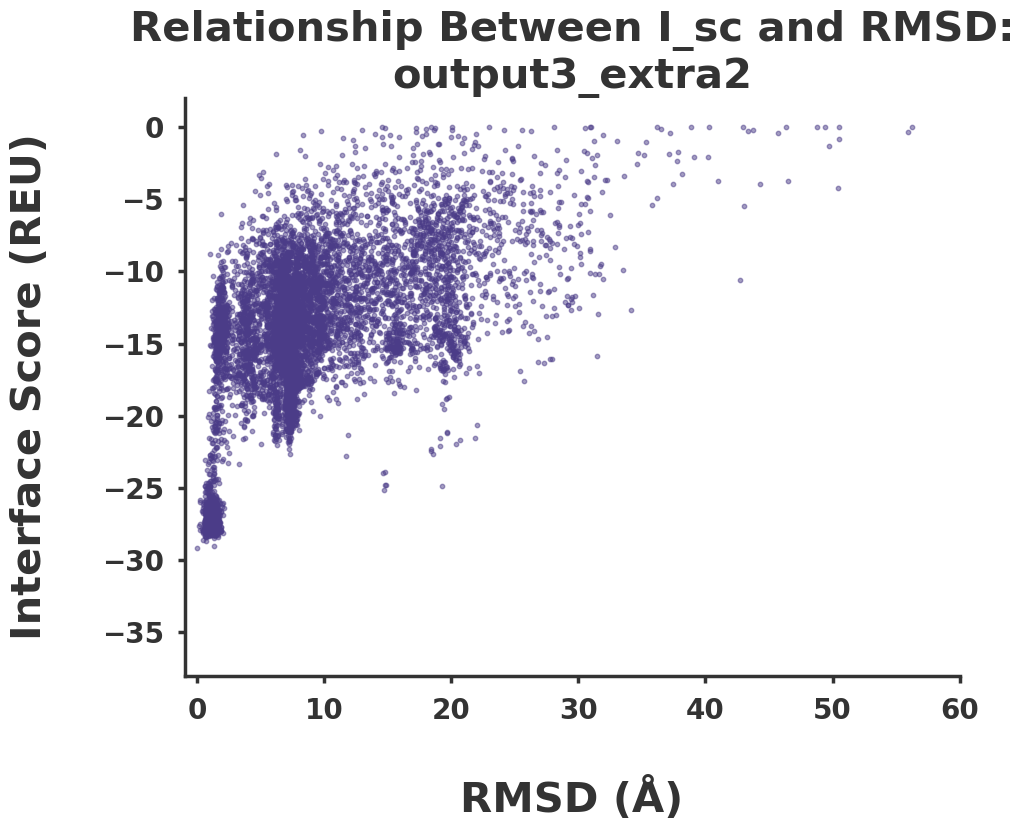

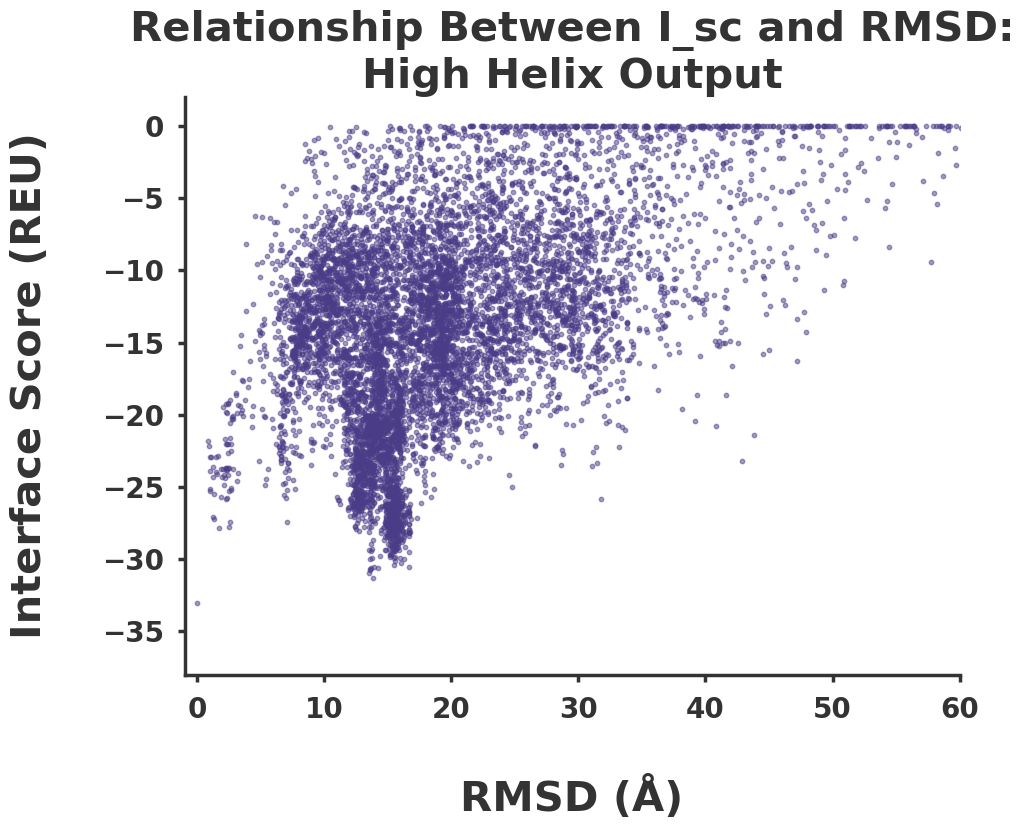

In [8]:

#['./output1_triplehelix/rmsd_script.csv', './output1_triplehelix/docking_values2.csv', 'output1_triplehelix'] ,
files = [['./output1_favorite/rmsd_script.csv', './output1_favorite/docking_values2.csv', 'High Helix Design 1'] , 
         ['./output1_doublehelix1/rmsd_script.csv', './output1_doublehelix1/docking_values2.csv', 'output1_doublehelix1'], 
         ['./output1_doublehelix2/rmsd_script.csv', './output1_doublehelix2/docking_values2.csv', 'output1_doublehelix2'],
         ['./output1_alpha_beta/rmsd_script.csv', './output1_alpha_beta/docking_values2.csv', 'output1_alpha_beta'],
         ['./output1_extra/rmsd_script.csv', './output1_extra/docking_values2.csv', 'output1_extra'],
         ['./output2_triplehelix/rmsd_script.csv', './output2_triplehelix/docking_values2.csv', 'Many Hotspots Design 1'],
         ['./output2_beta/rmsd_script.csv', './output2_beta/docking_values2.csv', 'output2_beta'],
         ['./output2_doublehelix/rmsd_script.csv', './output2_doublehelix/docking_values2.csv', 'Many Hotspots Design 2'],
         ['./output2_extra1/rmsd_script.csv', './output2_extra1/docking_values2.csv', 'output2_extra1'],
         ['./output2_extra2/rmsd_script.csv', './output2_extra2/docking_values2.csv', 'Many Hotspots Design 3'],
         ['./output3_alpha_beta/rmsd_script.csv', './output3_alpha_beta/docking_values2.csv', 'Long Sequence Design 1'],
         ['./output3_triplehelix/rmsd_script.csv', './output3_triplehelix/docking_values2.csv', 'output3_triplehelix'],
         ['./output3_extra1/rmsd_script.csv', './output3_extra1/docking_values2.csv', 'output3_extra1'],
         ['./output3_extra2/rmsd_script.csv', './output3_extra2/docking_values2.csv', 'output3_extra2'],
         ['./weird_structure/rmsd_script.csv', './weird_structure/docking_values2.csv', 'High Helix Output']
         ]

for file in files:
    combined_df = combine_csv(file[0], file[1])
    i_score_vs_rmsd(combined_df, file[2])
